## 정렬된 시퀀스를 검색할 때는 bisect를 사용하라



**메모리에 정렬된 리스트로 존재하는 커다란 데이터를 검색**

- 프로그램이 구체적으로 처리해야 하는 정보의 유형이 무엇이든, 리스트에서 index함수를 사용해서 특정 값을 찾아내려면 리스트 길이에 선형으로 비례하는 시간이 필요

In [1]:
#선형 비례

data = list(range(10**5))
index = data.index(91234)
assert index == 91234

*찾는 값이 리스트 안에 들어 있는지 모르다면, 원하는 값과 같거나 그보다 큰 값의 인덱스 중 가장 작은 인덱스를 찾기*

In [3]:
def find_closet(sequence, goal):
    for index, value in enumerate(sequence):
        if goal < value:

            return index

    raise ValueError(f'범위를 벗어남: {goal}')

index = find_closet(data, 91234.56)
assert index == 91235

### 파이썬 내장 bisect

- bisect 모듈은 순서가 정해져 있는 리스트에 대해 이런 유형의 검사를 더 효과적으로 수행

- bisect_letf함수를 사용하여 정렬된 원소로 이뤄진 시퀀스에 대해서 이진 검색

- bisect_left가 반환하는 인덱스는 리스트에 찾는 값의 원소가 존재하는 경우 이 원소의 인덱스

- 리스트에 찾는 값의 원소가 존재하지 않는 경우 정렬 순서상 해당 값을 삽입해야 할 자리의 인덱스

In [ ]:
from bisect import bisect_left

index = bisect_left(data, 91234) #정확한 일치
assert index == 91234

index = bisect_left(data, 91234.56) #근접한 값과 일치
assert index == 91235

index = bisect_left(data, 91234.23) #근접한 값과 일치(찾는 값 이상의 값 중에서 근접한 값을 찾음)
assert index == 91235

**bisect 모듈이 사용하는 이진 검색 알고리즘의 복잡도는 로그 복잡도다.**

- 길이가 100만인 리스트르 bisect로 검색하는데 걸리는 시간과 길이가 20인 리스트를 list.index로 선형 검색하는데 걸리는 시간이 같다.

- 그러므로, (math.log2(10**6) == 19.93) 이므로 bisect쪽이 훨씬 더 빠르다.

- timeit를 사용하여 마이크로 벤치마크를 수행해서 bisect를 사용하면 성능 향상 검증 가능


In [ ]:
import random
import timeit

size = 10 ** 5
iterations = 1000

data = list(range(size))
to_lookup = [random.randint(0, size)
             for _ in range(iterations)]

def run_linear(data, to_lookup):
    for index in to_lookup:
        data.index(index)

def run_bisect(data, to_lookup):
    for index in to_lookup:
        bisect_left(data, index)

baseline = timeit.timeit(
    stmt = 'run_linear(data, index)',
    globals = globals(),
    number = 10)
print(f'선형 검색: {baseline:.6f} 초')

comparison = timeit.timeit(
    stmt = 'run_bisect(data, to_lookup)',
    globals = globals(),
    number = 10)
print(f'이진 검색: {comparison:.6f}초')

slowdown = 1 + ((baseline - comparison) / comparison)
print(f'선형 검색이 {slowdown:1f}배 더 걸림')

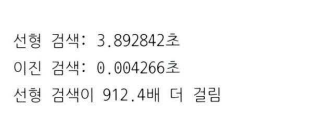

### Summary

- 리스트에 들어있는 정렬된 데이터를 검색할 때 index 메서드를 사용하거나 for 루프와 맹목적인 비교를 하면 선형 시간이 걸린다.

- bisect 내장 모듈의 biscet_left함수는 정렬된 리스트에서 원하는 값을 찾는데 로그 시간이 걸린다. 따라서 다른 접근 방법보다 훨씬 빠르다.